In [ ]:
!pip install pynrrd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import nrrd # https://pypi.org/project/pynrrd/
import os

# Some sample numpy data
data = np.zeros((5,4,3,2))
filename = 'testdata.nrrd'

# Write to a NRRD file
nrrd.write(filename, data)

# Read the data back from file
readdata, header = nrrd.read(filename)
print(readdata.shape)
print(header)

(5, 4, 3, 2)
OrderedDict([('type', 'double'), ('dimension', 4), ('sizes', array([5, 4, 3, 2])), ('endian', 'little'), ('encoding', 'gzip')])


In [ ]:
!wget https://heibox.uni-heidelberg.de/f/93346ac07ceb4c14a24f/?dl=1

--2021-06-12 10:12:08--  https://heibox.uni-heidelberg.de/f/93346ac07ceb4c14a24f/?dl=1
Resolving heibox.uni-heidelberg.de (heibox.uni-heidelberg.de)... 129.206.7.113
Connecting to heibox.uni-heidelberg.de (heibox.uni-heidelberg.de)|129.206.7.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://heibox.uni-heidelberg.de/seafhttp/files/4e4092cb-3461-4674-8030-c338f5203a36/all.zip [following]
--2021-06-12 10:12:10--  https://heibox.uni-heidelberg.de/seafhttp/files/4e4092cb-3461-4674-8030-c338f5203a36/all.zip
Reusing existing connection to heibox.uni-heidelberg.de:443.
HTTP request sent, awaiting response... 200 OK
Length: 598584 (585K) [application/zip]
Saving to: ‘index.html?dl=1’

index.html?dl=1     100%[===================>] 584.55K   425KB/s    in 1.4s    

2021-06-12 10:12:11 (425 KB/s) - ‘index.html?dl=1’ saved [598584/598584]



In [ ]:
!unzip 'index.html?dl=1'

Archive:  index.html?dl=1
   creating: all/
  inflating: all/patient100_frame13.nii  
  inflating: __MACOSX/all/._patient100_frame13.nii  
  inflating: all/patient100_frame13_rvip.nrrd  


In [ ]:
all_files = os.listdir('all')
print(all_files)

['patient100_frame13_rvip.nrrd', 'patient100_frame13.nii']


In [ ]:
readdata, header = nrrd.read('all/'+all_files[0])
print('image size ='+ str(readdata.shape))
print(header) 

image size =(216, 304, 8)
OrderedDict([('type', 'unsigned short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([216, 304,   8])), ('space directions', array([[ 1.31579006,  0.        ,  0.        ],
       [ 0.        ,  1.31579006,  0.        ],
       [-0.        , -0.        , 10.        ]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([0., 0., 0.])), ('DICOM_0008_0060', '{"values":[{"z":0, "t":0, "value":"SEG"}]}'), ('DICOM_0008_103E', '{"values":[{"z":0, "t":0, "value":"MITK Segmentation"}]}'), ('layer_000', '3'), ('layers', '1'), ('modality', 'org.mitk.image.multilabel'), ('org.mitk.label_000_00000', '<?xml version="1.0" encoding="UTF-8"?>\\n<Label>\\n    <property key="DICOM.0062.0002.0062.0004" type="TemporoSpatialStringProperty">\\n        <temporo_spatial_string>{"values":[{"z":0, "t":0, "value":"0"}]}</temporo_spatial_string>\\n    </property>\\n    <property key="DICOM.0062.0002.0

In [ ]:
import sys
np.set_printoptions(threshold=np.inf)
slice2D = readdata[:,:,1]
print(slice2D)


In [ ]:
print(np.nonzero(slice2D))
print(np.count_nonzero(slice2D))

(array([85, 85, 85, 86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 88, 88, 88, 88,
       88, 89, 89, 89, 92, 92, 92, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94,
       95, 95, 95, 95, 95, 96, 96, 96]), array([165, 166, 167, 164, 165, 166, 167, 168, 164, 165, 166, 167, 168,
       164, 165, 166, 167, 168, 165, 166, 167, 129, 130, 131, 128, 129,
       130, 131, 132, 128, 129, 130, 131, 132, 128, 129, 130, 131, 132,
       129, 130, 131]))
42


In [ ]:
print(np.argwhere(slice2D == 1))
print(np.argwhere(slice2D == 2))

In [ ]:
x_ax_1, y_ax_1 = np.where(slice2D == 1)
print(x_ax_1)
print(y_ax_1)
x_mean_1 = x_ax_1.mean();
y_mean_1 = y_ax_1.mean();
print(str(x_mean_1), str(y_mean_1))

x_ax_2, y_ax_2 = np.where(slice2D == 2)
print(x_ax_2)
print(y_ax_2)
x_mean_2 = x_ax_2.mean();
y_mean_2 = y_ax_2.mean();
print(str(x_mean_2), str(y_mean_2))

[92 92 92 93 93 93 93 93 94 94 94 94 94 95 95 95 95 95 96 96 96]
[129 130 131 128 129 130 131 132 128 129 130 131 132 128 129 130 131 132
 129 130 131]
94.0 130.0
[85 85 85 86 86 86 86 86 87 87 87 87 87 88 88 88 88 88 89 89 89]
[165 166 167 164 165 166 167 168 164 165 166 167 168 164 165 166 167 168
 165 166 167]
87.0 166.0


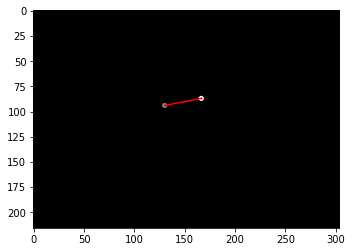

In [ ]:
plt.imshow(slice2D, cmap=plt.get_cmap('gray'))
plt.scatter(y_mean_1, x_mean_1, s=1, c='red')
plt.scatter(y_mean_2, x_mean_2, s=1, c='red')

x_values = [x_mean_1, x_mean_2]
y_values = [y_mean_1, y_mean_2]

plt.plot(y_values, x_values, c='red')

In [ ]:
number_of_slices = readdata.shape[2]
means = np.zeros(shape=(number_of_slices,4))
print(means)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:

x = range(number_of_slices)
for n in x:
  print('Current slice: ' + str(n))
  slice2D = readdata[:,:,n]
  if np.isin(1, slice2D) and np.isin(2, slice2D):
    print('We have two labels')
    x_ax_1, y_ax_1 = np.where(slice2D == 1)
    print('x indices of label 1' + str(x_ax_1))
    print('y indices of label 1' + str(y_ax_1))
    x_mean_1 = x_ax_1.mean();
    y_mean_1 = y_ax_1.mean();
    print('means: ' + str(x_mean_1), str(y_mean_1))

    x_ax_2, y_ax_2 = np.where(slice2D == 2)
    print('x indices of label 2' + str(x_ax_2))
    print('y indices of label 2' + str(y_ax_2))
    x_mean_2 = x_ax_2.mean();
    y_mean_2 = y_ax_2.mean();
    print('means: ', str(x_mean_2), str(y_mean_2))

    means[n] = [x_mean_1, x_mean_2, y_mean_1, y_mean_2]
  
print(means)

Current slice: 0
Current slice: 1
We have two labels
x indices of label 1[92 92 92 93 93 93 93 93 94 94 94 94 94 95 95 95 95 95 96 96 96]
y indices of label 1[129 130 131 128 129 130 131 132 128 129 130 131 132 128 129 130 131 132
 129 130 131]
means: 94.0 130.0
x indices of label 2[85 85 85 86 86 86 86 86 87 87 87 87 87 88 88 88 88 88 89 89 89]
y indices of label 2[165 166 167 164 165 166 167 168 164 165 166 167 168 164 165 166 167 168
 165 166 167]
means:  87.0 166.0
Current slice: 2
We have two labels
x indices of label 1[93 93 93 94 94 94 94 94 95 95 95 95 95 96 96 96 96 96 97 97 97]
y indices of label 1[124 125 126 123 124 125 126 127 123 124 125 126 127 123 124 125 126 127
 124 125 126]
means: 95.0 125.0
x indices of label 2[86 86 86 87 87 87 87 87 88 88 88 88 88 89 89 89 89 89 90 90 90]
y indices of label 2[162 163 164 161 162 163 164 165 161 162 163 164 165 161 162 163 164 165
 162 163 164]
means:  88.0 163.0
Current slice: 3
We have two labels
x indices of label 1[91 91 91 92 

In [ ]:
#centroid: 
#87/166
#94/130

#Davor: Bestimmung von x_small und x_large
#Zweipunkteformel:
#![[Pasted image 20210612140333.png]]

#f(x) = ((166-130)/(87-94)) * (x-x1) + y1

#Danach Formel auflösen von x_small bis x_large und jeden Punkt (x/f(x)) als Label 3 speichern

#Index Array: A[x/f(x)] = 3

/bin/bash: [[Pasted: command not found
